<a href="https://colab.research.google.com/github/akash-agni/DeepLearning/blob/Development/CIFAR_10_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

from tensorflow.keras import models, layers
from sklearn.metrics import accuracy_score

In [1]:
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

--2021-02-18 20:09:15--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M   101MB/s    in 1.6s    

2021-02-18 20:09:17 (101 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]



In [3]:
!mkdir ./cifar_10/
!tar -xf cifar-10-python.tar.gz -C ./cifar_10/
!rm -rf cifar-10-python.tar.gz

In [4]:
!ls -l ./cifar_10/cifar-10-batches-py/

total 181876
-rw-r--r-- 1 2156 1103      158 Mar 31  2009 batches.meta
-rw-r--r-- 1 2156 1103 31035704 Mar 31  2009 data_batch_1
-rw-r--r-- 1 2156 1103 31035320 Mar 31  2009 data_batch_2
-rw-r--r-- 1 2156 1103 31035999 Mar 31  2009 data_batch_3
-rw-r--r-- 1 2156 1103 31035696 Mar 31  2009 data_batch_4
-rw-r--r-- 1 2156 1103 31035623 Mar 31  2009 data_batch_5
-rw-r--r-- 1 2156 1103       88 Jun  4  2009 readme.html
-rw-r--r-- 1 2156 1103 31035526 Mar 31  2009 test_batch


In [5]:
workdir = os.curdir
datadir = os.path.join(workdir,'cifar_10','cifar-10-batches-py')
train_files = [os.path.join(datadir,f'data_batch_{i}') for i in range(1,6)]
test_file = 'test_batch'

In [6]:
# unpickle the data file containing the image
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [7]:
data_dict = unpickle(train_files[0])
data_dict.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [8]:
# read all files into a dataset
data = np.empty(data_dict[b'data'].shape)
labels = list()
for fl in train_files:
  print(f"Loading File {fl}")
  df = unpickle(fl)
  print(df[b'batch_label'])
  print(f"Geting Data")
  if df[b'batch_label'] == b'training batch 1 of 5':
    data = df[b'data']
  else:
    data = np.concatenate([data,df[b'data']])
  print("Geting labels")
  labels = labels + df[b'labels']
  print(f"Shape of Data is {data.shape}")
  print("="*50)

Loading File ./cifar_10/cifar-10-batches-py/data_batch_1
b'training batch 1 of 5'
Geting Data
Geting labels
Shape of Data is (10000, 3072)
Loading File ./cifar_10/cifar-10-batches-py/data_batch_2
b'training batch 2 of 5'
Geting Data
Geting labels
Shape of Data is (20000, 3072)
Loading File ./cifar_10/cifar-10-batches-py/data_batch_3
b'training batch 3 of 5'
Geting Data
Geting labels
Shape of Data is (30000, 3072)
Loading File ./cifar_10/cifar-10-batches-py/data_batch_4
b'training batch 4 of 5'
Geting Data
Geting labels
Shape of Data is (40000, 3072)
Loading File ./cifar_10/cifar-10-batches-py/data_batch_5
b'training batch 5 of 5'
Geting Data
Geting labels
Shape of Data is (50000, 3072)


In [9]:
# Reading Metadata
label_meta = unpickle(os.path.join(datadir,'batches.meta'))[b'label_names']
label_meta_mapping = {i:label_meta[i].decode('utf-8') for i in range(len(label_meta))}
label_meta_mapping

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

In [10]:
labels = np.array(labels)
for i in range(0,10):
  lb_count = np.sum((labels == i)*1)
  print(f"{label_meta_mapping[i]}: {lb_count}")

airplane: 5000
automobile: 5000
bird: 5000
cat: 5000
deer: 5000
dog: 5000
frog: 5000
horse: 5000
ship: 5000
truck: 5000


In [11]:
data_rgb = np.reshape(data, (data.shape[0], 3, 32, 32)).transpose(0, 2, 3, 1)

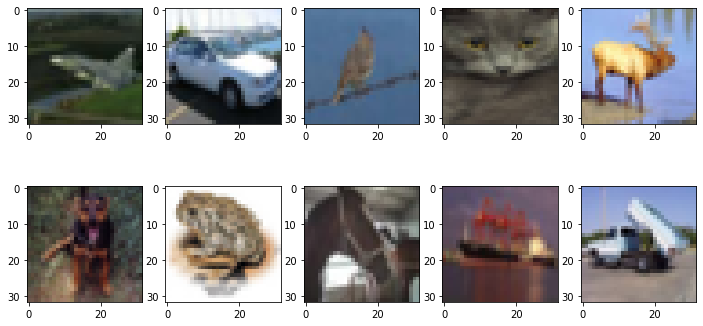

In [12]:
rnd_idx = np.random.randint(1,5000)
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12,6))
for i in range(10):
  samp = data_rgb[labels == i][rnd_idx,:,:,:]
  ax[int(i/5)][i%5].imshow(samp)

In [14]:
X = data_rgb
X_mean = np.mean(X)
X_std = np.mean(X)
X = (X - X_mean)/X_std
lb_bin = LabelBinarizer().fit(np.array(labels))
y = lb_bin.transform(np.array(labels))
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.1)
#test_X, val_X, test_y, val_y = train_test_split(test_X, test_y, test_size=0.7)
print(f"Training Data Size : {train_X.shape[0]}")
#print(f"Validation Data Size : {val_X.shape[0]}")
print(f"Testing Data Size : {test_X.shape[0]}")

Training Data Size : 45000
Testing Data Size : 5000


In [16]:
def Residual_Layer(input_layer, filters, layer_len, reg, dr):
  print(filters, layer_len)
  # Main Branch
  x = tf.keras.layers.Conv2D(filters=filters, kernel_size=(3, 3), strides=1, padding='same', kernel_regularizer=reg)(input_layer)
  x = tf.keras.layers.BatchNormalization()(x)

  for i in range(1, layer_len):
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.Conv2D(filters=filters, kernel_size=(3, 3), strides=1, padding='same', kernel_regularizer=reg)(x)
    x = tf.keras.layers.BatchNormalization()(x)

  # Skip Branch
  x1 = tf.keras.layers.Conv2D(filters=filters, kernel_size=(1, 1), strides=1, padding='same', kernel_regularizer=reg)(input_layer)
  x1 = tf.keras.layers.BatchNormalization()(x1)

  # join the 2 branches
  x = tf.keras.layers.add([x, x1])
  x = tf.keras.layers.Activation('relu')(x)
  x = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2)(x)
  x = tf.keras.layers.Dropout(dr)(x)
  return x

In [17]:
def define_model(main_layer, reg=None, dr=0.0, dr2=0.0):
  inputs = tf.keras.Input(shape=train_X.shape[1:])
  
  x = tf.keras.layers.Conv2D(32, 5, strides=1, padding='same')(inputs)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Activation('relu')(x)
  x = tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2)(x)

  for filters, layer_len in main_layer:
    x = Residual_Layer(x, filters, layer_len, reg, dr)

  x = tf.keras.layers.GlobalAveragePooling2D()(x)
  x = tf.keras.layers.Flatten()(x)
  x = tf.keras.layers.Dropout(dr2)(x)
  x = tf.keras.layers.Dense(128, kernel_regularizer=reg)(x)
  x = tf.keras.layers.Dropout(dr2)(x)
  x = tf.keras.layers.Dense(64, kernel_regularizer=reg)(x)
  x = tf.keras.layers.Dropout(dr2)(x)
  x = tf.keras.layers.Dense(32, kernel_regularizer=reg)(x)
  outputs = tf.keras.layers.Dense(10, activation='softmax')(x)

  model = tf.keras.Model(inputs, outputs)
  return model

In [48]:
reg = tf.keras.regularizers.L2(l2=0.001)
main_layer = [(64,3), (128,3), (256,3), (512, 4)]
dr = 0.3
dr2 = 0.4
model = define_model(main_layer, reg, dr, dr2)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

64 3
128 3
256 3
512 4
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 32, 32, 32)   2432        input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_15 (BatchNo (None, 32, 32, 32)   128         conv2d_15[0][0]                  
__________________________________________________________________________________________________
activation_11 (Activation)      (None, 32, 32, 32)   0           batch_normalization_15[0][0]     
_____________________________________________________________________

In [49]:
erly_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0.001, patience=10, verbose=1,
    mode='auto', baseline=None, restore_best_weights=True,
)

model_monit = tf.keras.callbacks.ModelCheckpoint(
    os.path.join(os.curdir,'Checkpoint.model'), monitor='val_loss', verbose=0, save_best_only=True,
    save_weights_only=True, mode='min'
)

def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn

#exponential_decay_fn = exponential_decay(lr0=0.01, s=10)
#lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda x: 0.01)
val_loss, loss, accuracy, val_accuracy = list(), list(), list(), list()

In [ ]:
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda x: 0.01)
history = model.fit(x=train_X, y=train_y, batch_size=256, epochs=50, validation_split=0.10,
                    callbacks=[lr_scheduler, erly_stop, model_monit])
val_loss = val_loss + history.history['val_loss']
val_accuracy = val_accuracy + history.history['val_accuracy']
loss = loss +  history.history['loss']
accuracy = accuracy + history.history['accuracy']

Epoch 1/50
159/159 [==============================] - 14s 64ms/step - loss: 24.7767 - accuracy: 0.1109 - val_loss: 7.2984 - val_accuracy: 0.1131
Epoch 2/50
159/159 [==============================] - 9s 60ms/step - loss: 5.8653 - accuracy: 0.1637 - val_loss: 3.6854 - val_accuracy: 0.1049
Epoch 3/50
159/159 [==============================] - 10s 60ms/step - loss: 3.2149 - accuracy: 0.2454 - val_loss: 3.4300 - val_accuracy: 0.1907
Epoch 4/50
159/159 [==============================] - 10s 60ms/step - loss: 2.6819 - accuracy: 0.3505 - val_loss: 2.8085 - val_accuracy: 0.2184
Epoch 5/50
159/159 [==============================] - 10s 61ms/step - loss: 2.3317 - accuracy: 0.4076 - val_loss: 2.7437 - val_accuracy: 0.2416
Epoch 6/50
 68/159 [===========>..................] - ETA: 5s - loss: 2.1207 - accuracy: 0.4476

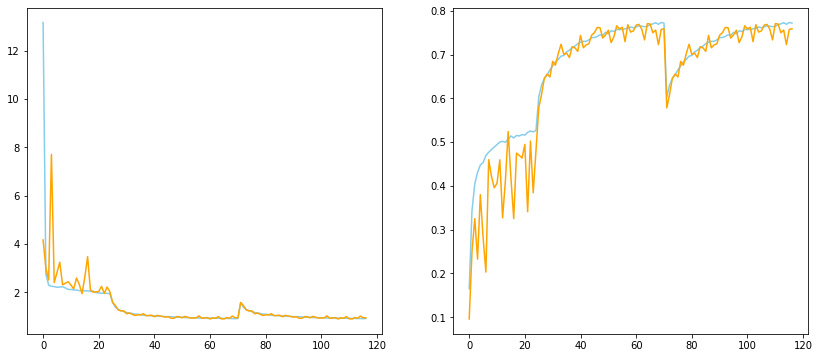

In [30]:
fig, ax = plt.subplots(ncols=2, figsize=(14,6))
x = list(range(len(val_loss)))

sns.lineplot(x=x, y=loss, ax=ax[0], color='skyblue')
sns.lineplot(x=x, y=val_loss, ax=ax[0], color='orange')

sns.lineplot(x=x, y=accuracy, ax=ax[1], color='skyblue')
sns.lineplot(x=x, y=val_accuracy, ax=ax[1], color='orange')

In [31]:
def top_5_error_rate(predict_proba, y_true):
  result = 0
  for i in range(len(y_true)):
    row = predict_proba[i,:]
    top_5 = sorted(range(len(row)), key = lambda x: row[x], reverse=True)[:5]
    if np.argmax(y_true[i]) in top_5:
      result = result + 1
  
  return result/len(y_true)

In [32]:
proba = model.predict(test_X)
print(f'Accuracy Score : {model.evaluate(test_X, test_y)}')
print(top_5_error_rate(proba, test_y))

157/157 [==============================] - 1s 6ms/step - loss: 0.7493 - accuracy: 0.7946
Accuracy Score : [0.7492731809616089, 0.7946000099182129]
0.9852


In [33]:
test_batch = unpickle(os.path.join(datadir,'test_batch'))
test_data = test_batch[b'data']
test_labels = test_batch[b'labels']

In [34]:
test_data = np.reshape(test_data, (test_data.shape[0], 3, 32, 32)).transpose(0, 2, 3, 1)

'frog'

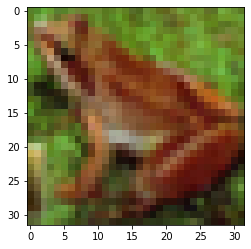

In [35]:
idx = np.random.randint(200)
plt.imshow(test_data[idx])
label_meta_mapping[test_labels[idx]]

In [41]:
test_data_ss = (test_data - X_mean)/X_std
proba_test = model.predict(test_data_ss)
y_test_bat = lb_bin.transform(np.array(test_labels))
print(f'Accuracy Score : {model.evaluate(test_data_ss, y_test_bat)}')
print(top_5_error_rate(proba_test, y_test_bat))

313/313 [==============================] - 2s 6ms/step - loss: 0.7749 - accuracy: 0.7921
Accuracy Score : [0.7748608589172363, 0.7921000123023987]
0.9848


Acutal Label: frog
Predicted Label: frog
{'frog': 0.9982734, 'bird': 0.0007107428, 'cat': 0.000470741, 'deer': 0.0002608749}


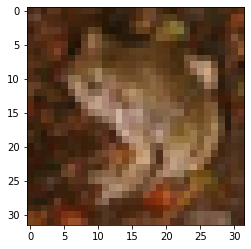

In [47]:
idx = np.random.randint(1000)
prediction = proba_test[idx]
prediction_label = label_meta_mapping[np.argmax(prediction)]
actual = label_meta_mapping[test_labels[idx]]
print(f"Acutal Label: {actual}\nPredicted Label: {prediction_label}")
row = prediction
top_5 = sorted(range(len(row)), key = lambda x: row[x], reverse=True)[:5]
top_5 = [label_meta_mapping[i] for i in top_5]
top_5 = dict(zip(top_5, list(np.sort(prediction))[-1:-5:-1]))
print(top_5)
fig = plt.imshow(test_data[idx])